In [1]:
import os

# from deepface import DeepFace

import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

In [23]:
dots = np.random.rand(10,2)

In [24]:
dots

array([[0.16141275, 0.29183873],
       [0.57134395, 0.45245254],
       [0.21290182, 0.0870691 ],
       [0.24758695, 0.30703155],
       [0.1616806 , 0.64694788],
       [0.75015243, 0.45528147],
       [0.68038397, 0.03822462],
       [0.16341868, 0.33368796],
       [0.58267189, 0.662602  ],
       [0.21038806, 0.44452811]])

In [34]:
y =  (np.random.rand(10)*23).astype(np.uint8)

In [35]:
y

array([ 0,  0,  1,  8,  7,  2, 16,  4,  5, 11], dtype=uint8)

In [71]:
range(max(y))

range(0, 16)

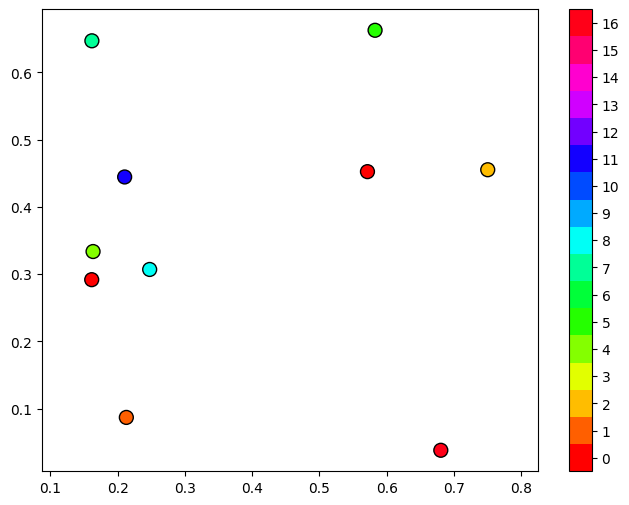

In [79]:
# plt.scatter(tsne[:, 0], tsne[:, 1], cmap='hsv', s= 100, c=indexed_dataSet, edgecolors=['black'], linewidth = 1)
plt.scatter(dots[:, 0], dots[:, 1], cmap='hsv', s= 100, c=y, edgecolors=['black'], linewidth = 1)
plt.gca().set_aspect('equal', 'datalim')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
# cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
# cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
colorbar = plt.colorbar(boundaries=np.arange(max(y)+2)-0.5)
colorbar.set_ticks(range(max(y)+1))
colorbar.ax.set_yticklabels(range(max(y)+1))
# plt.title(f't-SNE on {face_recognition_model} embeddings', fontsize=24);
# plt.xticks(np.linspace(-5, 5, 6))
# plt.yticks(np.linspace(-5, 5, 6))
plt.gcf().set_size_inches(8, 6)
# plt.style.use(style_name)
# plt.savefig(f"t-sne_{face_recognition_model}.png")

In [80]:
import os

from deepface import DeepFace

import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

2024-06-01 15:02:50.003713: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 15:02:50.003758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 15:02:50.003775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-01 15:02:50.008321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [147]:
face_embeddings = []
embedding_labels = []

# face_recognition_model = "Facenet"
face_recognition_model = "VGG-Face"

dataset_path = "/tf/data/dataset_clean/"
people_list = [person for person in os.listdir(os.path.join(dataset_path, "center/center")) if not person.startswith(".")]
print(people_list)
print(len(people_list))

['aabatashova', 'aamartynenko_9', 'aapardaev', 'aaraimova', 'aazheltov_1', 'adletunov', 'adpiskunov', 'aimilovanova', 'akklochkova', 'ameliseenko', 'amsirotkin', 'amzayakina', 'anguen', 'ankarabutova', 'appecherskih', 'arandarbua', 'archilingarov', 'arkhabibullina_3', 'asbaranova', 'aschinkov', 'assupolyarina', 'avkarpukhin_1', 'avpanarin', 'avpapina', 'avvorobev_5', 'ayuvasileva_1', 'baserebrov', 'dadmitriev', 'dashubin', 'datikhomirov', 'demirkin', 'deredin_1', 'didiulgerov', 'dkorolev', 'dmbobrova', 'drsmirnov', 'dvzaitseva', 'eabykova_6', 'eamilekhina', 'eelogvina', 'eggadzhiev', 'emdanilov', 'evdarkhanov', 'gaataev', 'gdpekert', 'imdolgov', 'imsalakhov', 'ipustenko', 'ischekanov', 'isulanova', 'ivlukianov', 'ivsemichasnov', 'kdfrolov', 'kdgryazeva', 'khtalbegov', 'kvnovikov', 'limiroshnichenko', 'madusov', 'mapivovarova', 'masadkovskaya', 'mdmilchakova', 'mdspitsyn', 'mismailzade', 'mvemelianenko', 'mvmoiseev', 'mvyakovlev_1', 'myumikheev', 'narybakovskiy', 'ndkubaev', 'nklimin', 

In [97]:
embedding = DeepFace.represent(
  img_path = "/tf/data/dataset_full/center/center/aabarstok/glasses.JPG", model_name = face_recognition_model
)
print(type(embedding[0]['embedding']))
print(len(embedding[0]['embedding']))
# print(embedding[0]['embedding'])

<class 'list'>
4096


In [98]:
for person in tqdm(people_list):
    person_directory_path = os.path.join(faces_folder_path, person)
    for image in [image for image in os.listdir(person_directory_path) if image.endswith(('.JPG', '.jpg'))]:
        image_path = os.path.join(person_directory_path,image)
        embedding = DeepFace.represent(
          img_path = image_path, model_name = face_recognition_model
        )
        face_embeddings.append(embedding[0]['embedding'])
        embedding_labels.append(person)
        # print(face_embeddings)
        # print(embedding)

face_embeddings = np.asarray(face_embeddings)
print(f"embeddings array formed, it's shape is {face_embeddings.shape}")

100%|██████████| 64/64 [00:48<00:00,  1.33it/s]

embeddings array formed, it's shape is (81, 4096)


In [118]:
def plot_tsne(tsne, face_recognition_model, embedding_labels, suffix = ""):
    print(tsne.shape)
    lookupTable, indexed_dataSet = np.unique(embedding_labels, return_inverse=True)
    print(len(indexed_dataSet))
    print(np.unique(embedding_labels).shape)
    plt.scatter(tsne[:, 0], tsne[:, 1], cmap='hsv', s= 100, c=indexed_dataSet, edgecolors=['black'], linewidth = 1)
    plt.gca().set_aspect('equal', 'datalim')
    plt.gcf().set_size_inches(20, 15)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    # cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    # cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
      # vertically oriented colorbar
    for i, txt in zip(tsne, embedding_labels):
        plt.annotate(txt, (i[0], i[1]), fontsize=5, rotation=45)
    colorbar = plt.colorbar(boundaries=np.arange(len(np.unique(embedding_labels))+1)-0.5)
    colorbar.set_ticks(range(len(np.unique(embedding_labels))))
    colorbar.ax.set_yticklabels(np.unique(embedding_labels))
    plt.title(f't-SNE on {face_recognition_model} embeddings', fontsize=24)
    plt.xticks(np.linspace(-6, 6, 7))
    plt.yticks(np.linspace(-6, 6, 7))
    plt.tight_layout()
    plt.savefig(f"t-sne_{face_recognition_model}_center_center{suffix}.png", dpi=150)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.9 µs
(81, 2)
81
(63,)


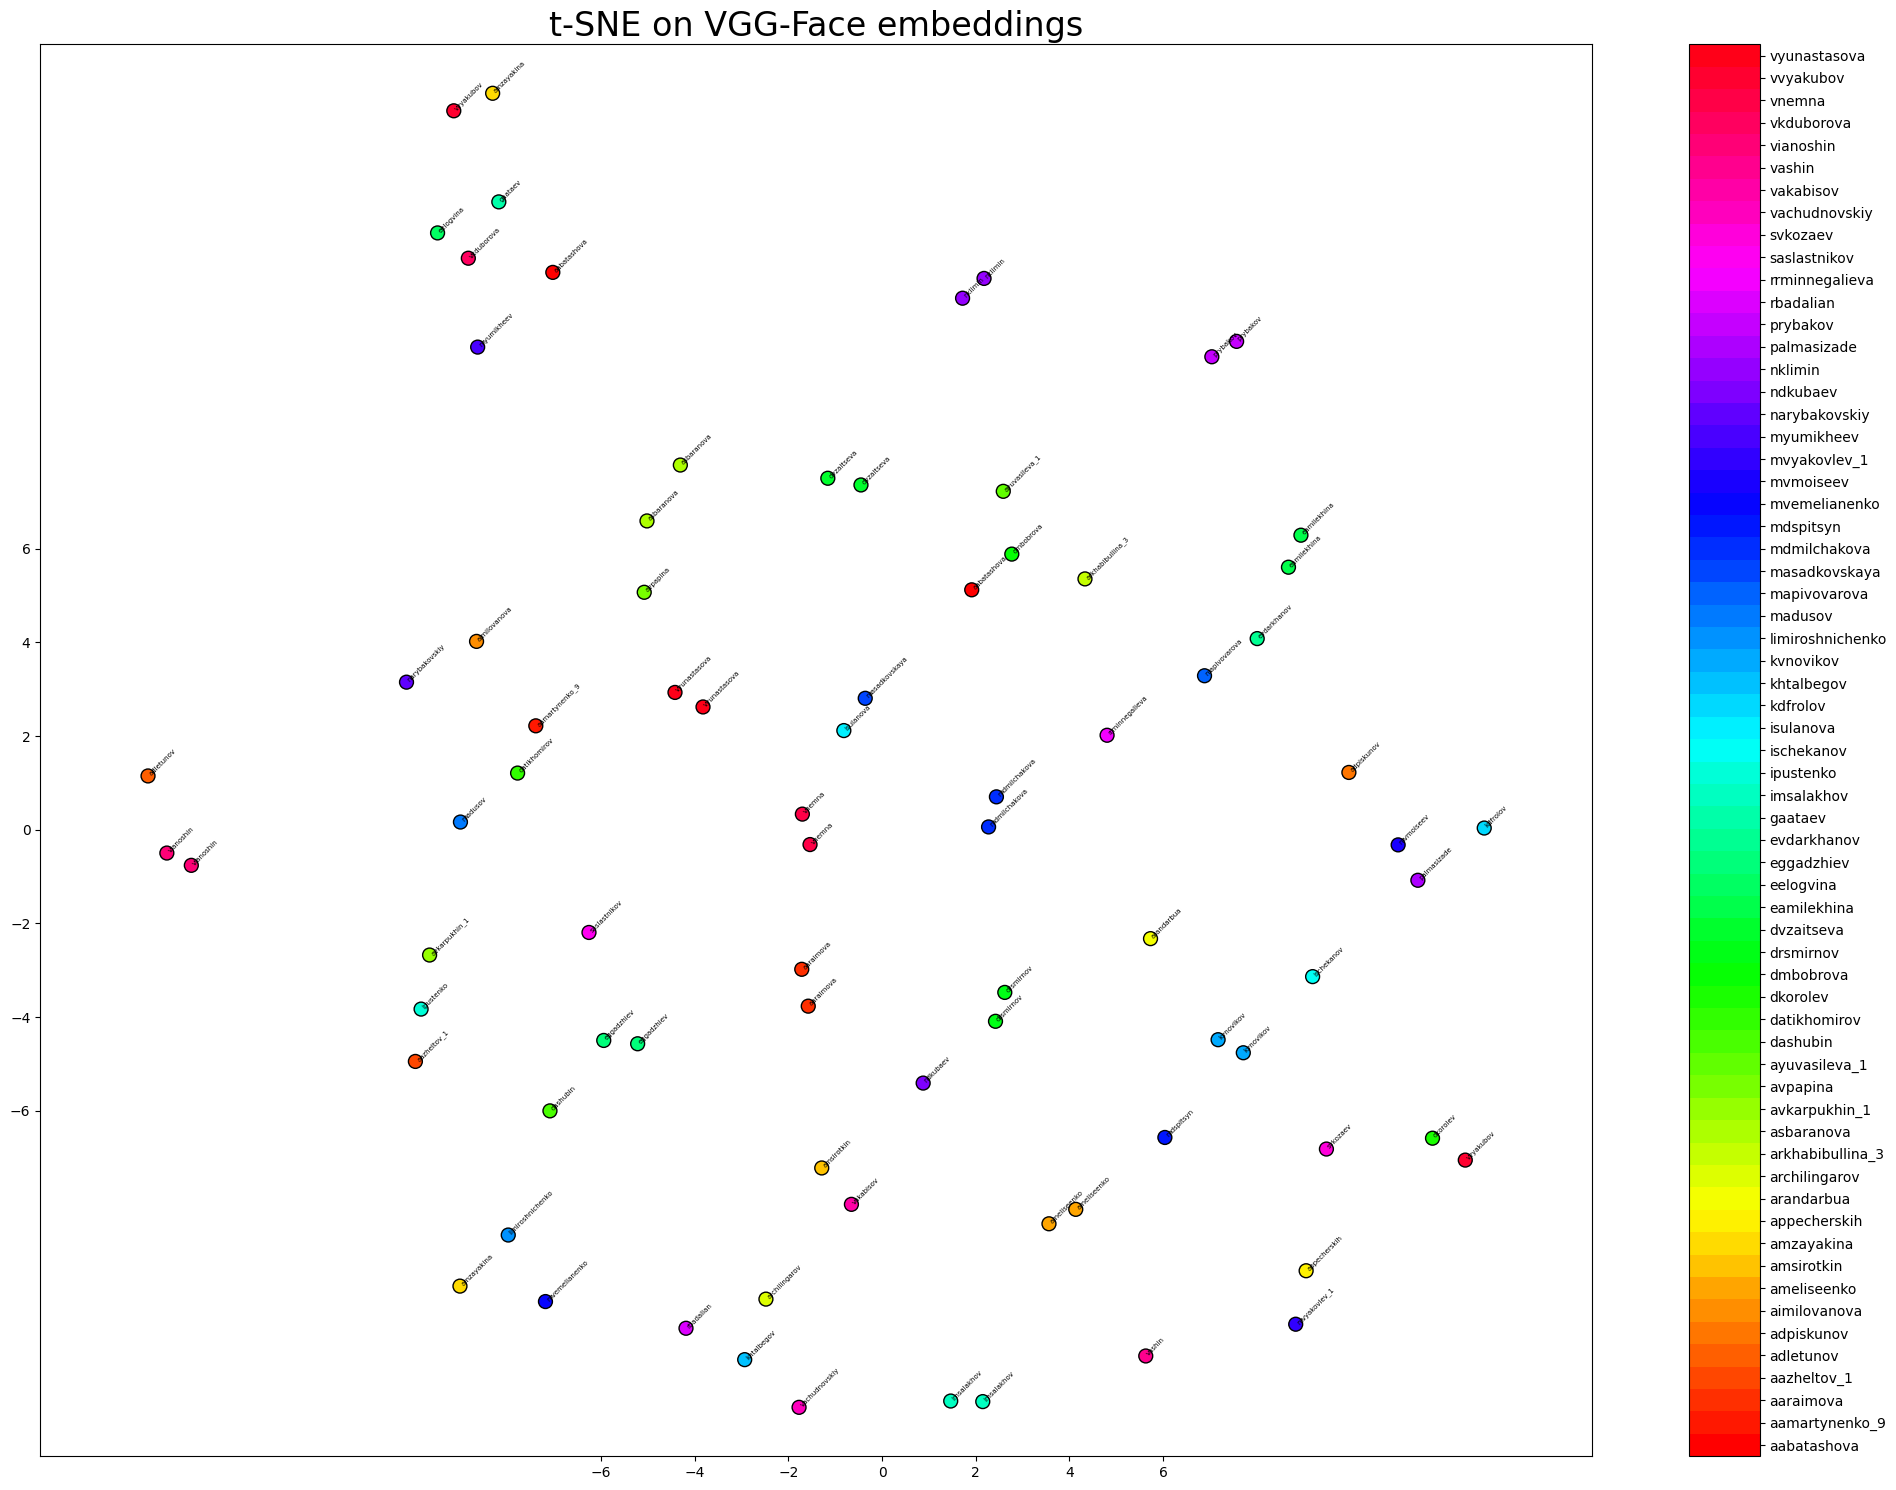

In [146]:
%time
perplexity = 15
n_iter = 5000
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=n_iter).fit_transform(face_embeddings)
plot_tsne(tsne, face_recognition_model, embedding_labels, suffix=f"{perplexity}_{n_iter}")

(81, 2)
81
(63,)


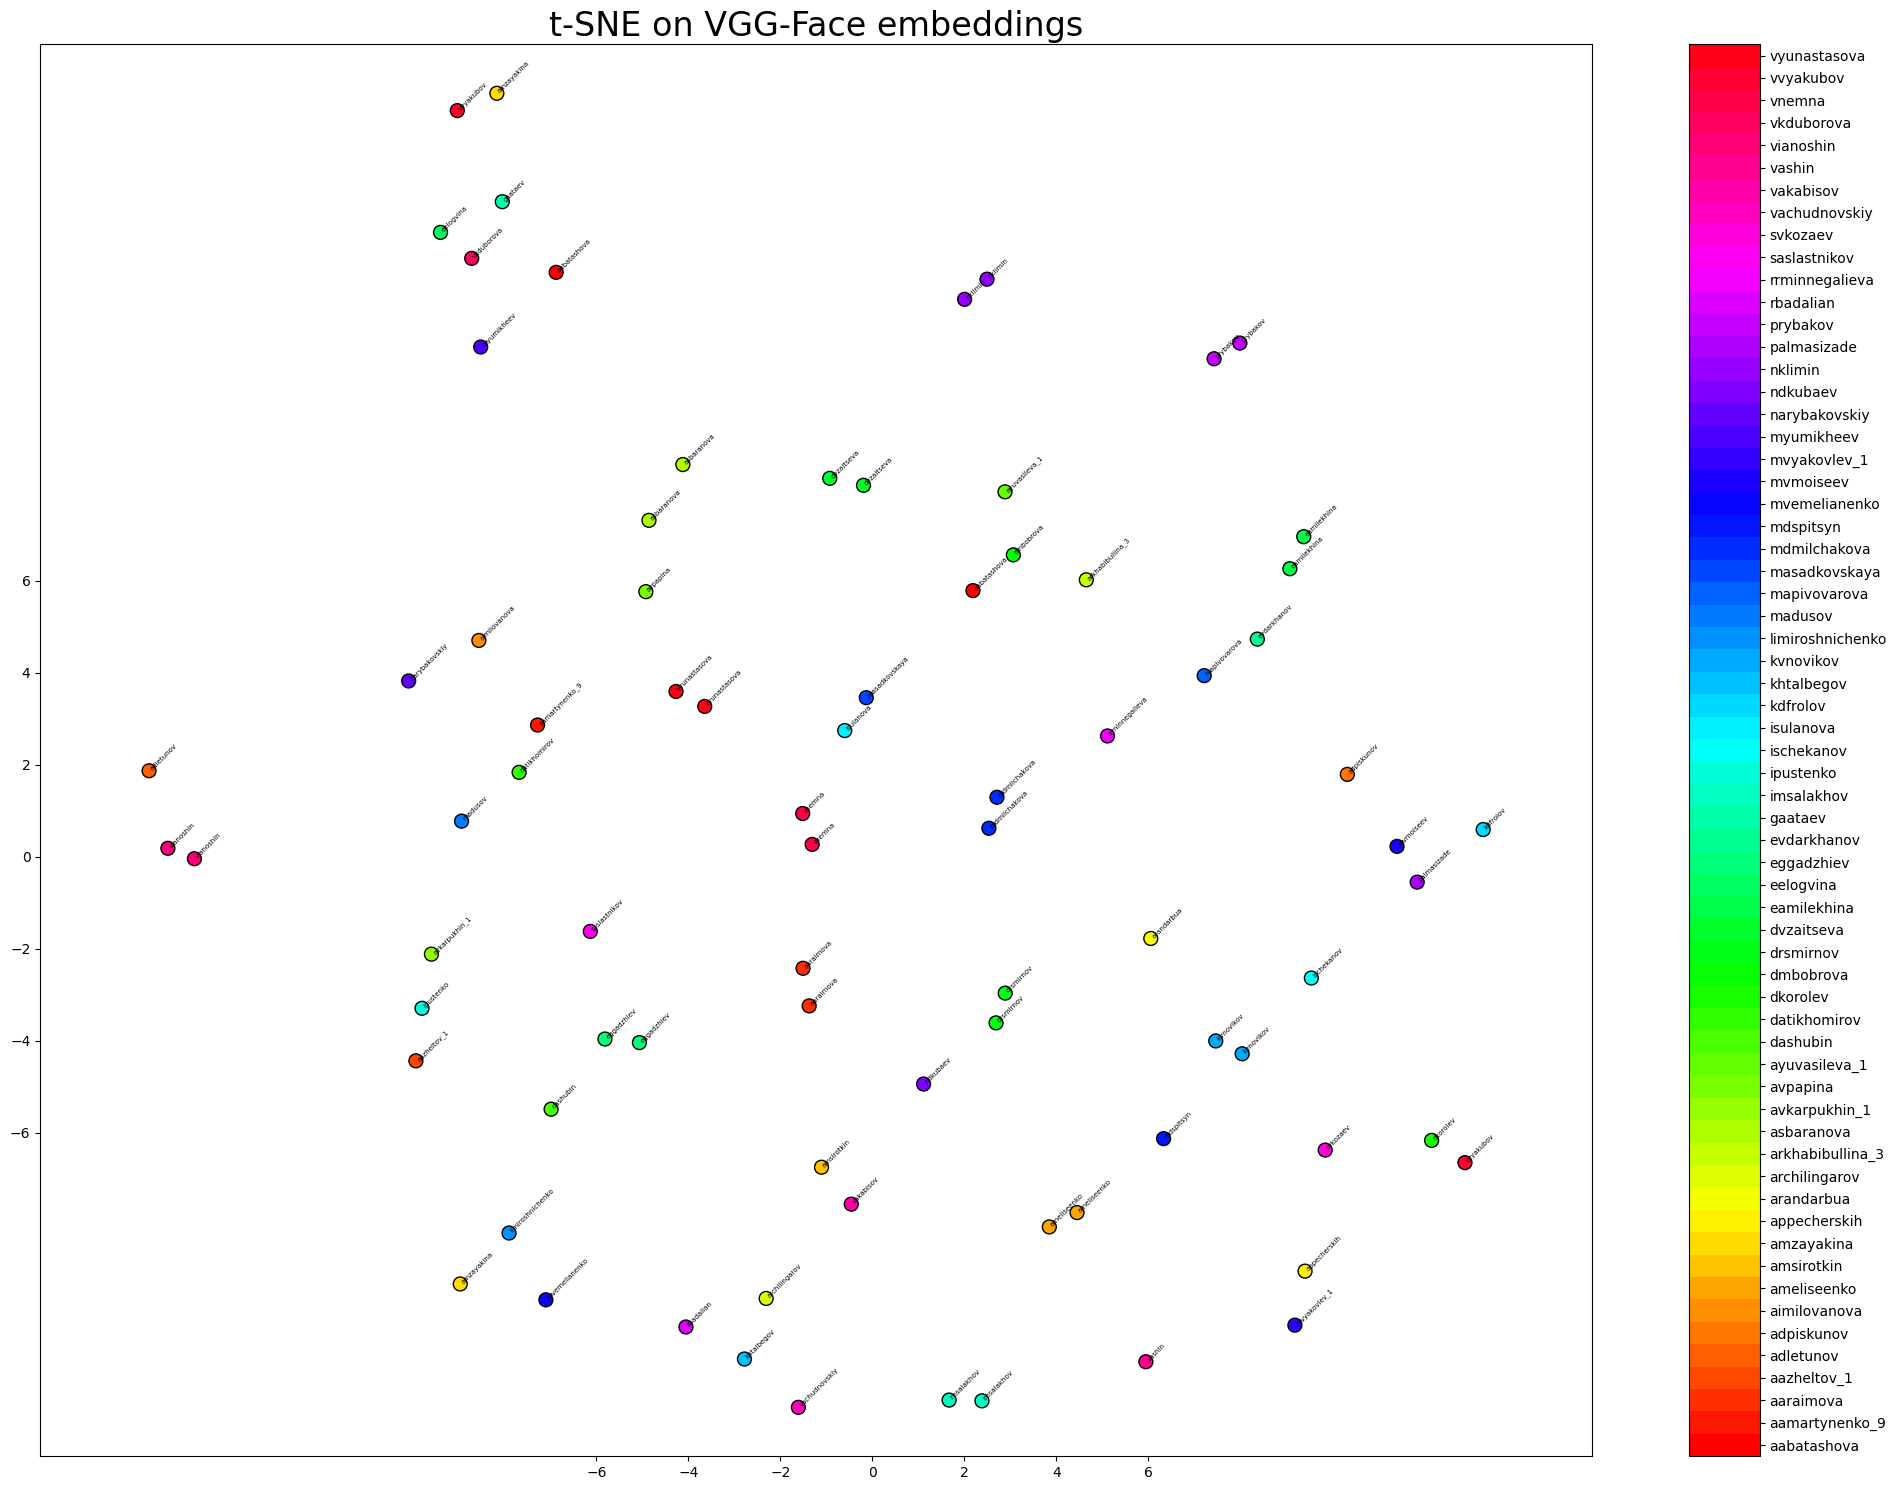